In [2]:
library(maptools)

In [5]:
library(osmar)

In [6]:
library(ggmap)

In [8]:
library(plotly)

In [9]:
src <- osmsource_api()

In [10]:
box <- center_bbox(-1.53492, 53.81934, 3000, 3000)
chapeltown <- get_osm(box, source = src)

In [11]:
str(chapeltown)

List of 3
 $ nodes    :List of 2
  ..$ attrs:'data.frame':	15811 obs. of  9 variables:
  .. ..$ id       : num [1:15811] 10437656 10437695 10437785 10437794 10437854 ...
  .. ..$ visible  : Factor w/ 1 level "true": 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ timestamp: POSIXlt[1:15811], format: "2008-08-29 17:31:53" "2008-02-04 03:58:31" ...
  .. ..$ version  : num [1:15811] 2 2 1 1 1 2 2 1 1 2 ...
  .. ..$ changeset: num [1:15811] 450256 38672 56822 56822 56822 ...
  .. ..$ user     : Factor w/ 113 levels "%20Bunny","AGDTurner",..: 48 31 45 45 45 48 48 45 45 48 ...
  .. ..$ uid      : Factor w/ 113 levels "101992","104459",..: 43 18 94 94 94 43 43 94 94 43 ...
  .. ..$ lat      : num [1:15811] 53.8 53.8 53.8 53.8 53.8 ...
  .. ..$ lon      : num [1:15811] -1.54 -1.54 -1.54 -1.54 -1.54 ...
  ..$ tags :'data.frame':	5897 obs. of  3 variables:
  .. ..$ id: num [1:5897] 10437695 21069412 21069412 21069412 21069422 ...
  .. ..$ k : Factor w/ 113 levels "abandoned","access",..: 25 42 27 26 42 42 25 4

In [12]:
ts <- find(chapeltown, node(tags(v == "traffic_signals")))
ts_chapeltown <- subset(chapeltown, node_ids = ts)

In [13]:
bs <- find(chapeltown, node(tags(v %agrep% "busstop")))
bs_chapeltown <- subset(chapeltown, node_ids = bs)

In [14]:
hw <- find(chapeltown, way(tags(k == "highway")))
hw <- find_down(chapeltown, way(hw))

In [15]:
hw_chapeltown <- subset(chapeltown, ids = hw)

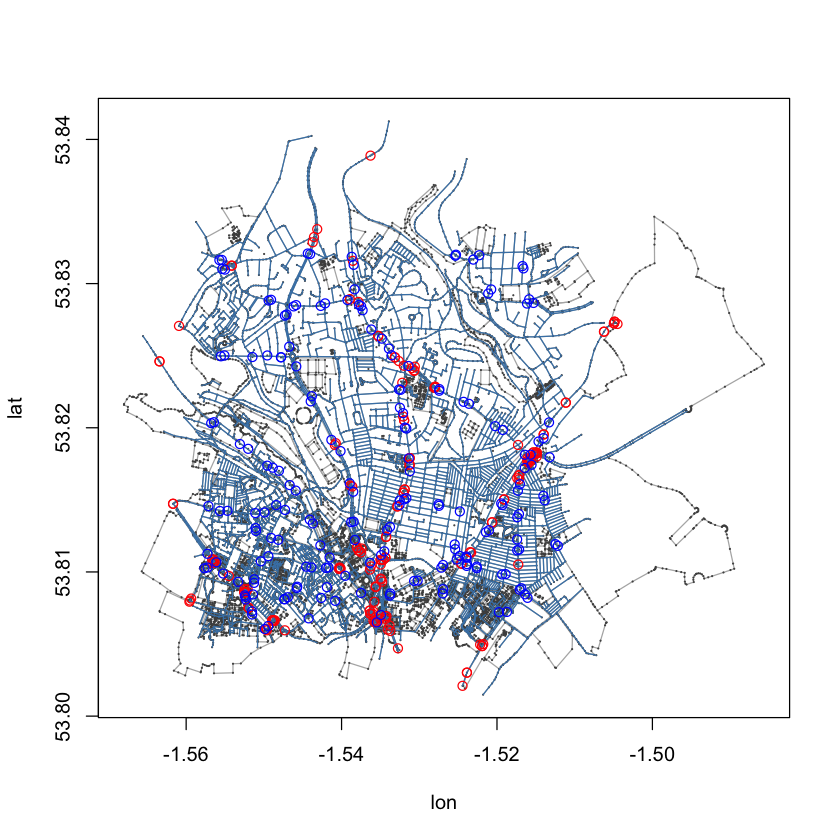

In [16]:
plot(chapeltown)
plot_ways(hw_chapeltown, add = TRUE, col = "steelblue")
plot_nodes(ts_chapeltown, add = TRUE, col = "red")
plot_nodes(bs_chapeltown, add = TRUE, col = "blue")

In [17]:
bigbox <- corner_bbox(54.5, 24.2, 54.8, 24.4)
big_abu_dhabi <- get_osm(bigbox, source = src)

In [19]:
str(big_abu_dhabi)

List of 3
 $ nodes    :List of 2
  ..$ attrs:'data.frame':	53206 obs. of  9 variables:
  .. ..$ id       : num [1:53206] 4.17e+09 4.17e+09 4.17e+09 4.17e+09 4.17e+09 ...
  .. ..$ visible  : Factor w/ 1 level "true": 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ timestamp: POSIXlt[1:53206], format: "2016-05-07 03:56:35" "2016-05-07 03:56:35" ...
  .. ..$ version  : num [1:53206] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ changeset: num [1:53206] 39155198 39155198 39155198 39155198 39155198 ...
  .. ..$ user     : Factor w/ 193 levels "13 digits","abel801",..: 163 163 163 163 163 163 163 163 163 163 ...
  .. ..$ uid      : Factor w/ 193 levels "1069176","1074501",..: 12 12 12 12 12 12 12 12 12 12 ...
  .. ..$ lat      : num [1:53206] 24.3 24.3 24.3 24.3 24.3 ...
  .. ..$ lon      : num [1:53206] 54.6 54.6 54.6 54.6 54.6 ...
  ..$ tags :'data.frame':	2501 obs. of  3 variables:
  .. ..$ id: num [1:2501] 1.24e+09 1.24e+09 2.62e+08 2.62e+08 2.62e+08 ...
  .. ..$ k : Factor w/ 63 levels "addr:city","addr:country",.

In [20]:
smallbox <- corner_bbox(54.61, 24.21, 54.75, 24.35)
small_abu_dhabi <- get_osm(smallbox, source = src)

In [21]:
ts <- find(small_abu_dhabi, node(tags(v == "traffic_signals")))
ts_abu_dhabi <- subset(small_abu_dhabi, node_ids = ts)

In [22]:
bs <- find(small_abu_dhabi, node(tags(v %agrep% "busstop")))
bs_abu_dhabi <- subset(small_abu_dhabi, node_ids = bs)

In [24]:
hw <- find(small_abu_dhabi, way(tags(k == "highway")))
hw <- find_down(small_abu_dhabi, way(hw))

In [25]:
hw_abu_dhabi <- subset(small_abu_dhabi, ids = hw)

In [26]:
options(repr.plot.width = 9, repr.plot.height = 9)

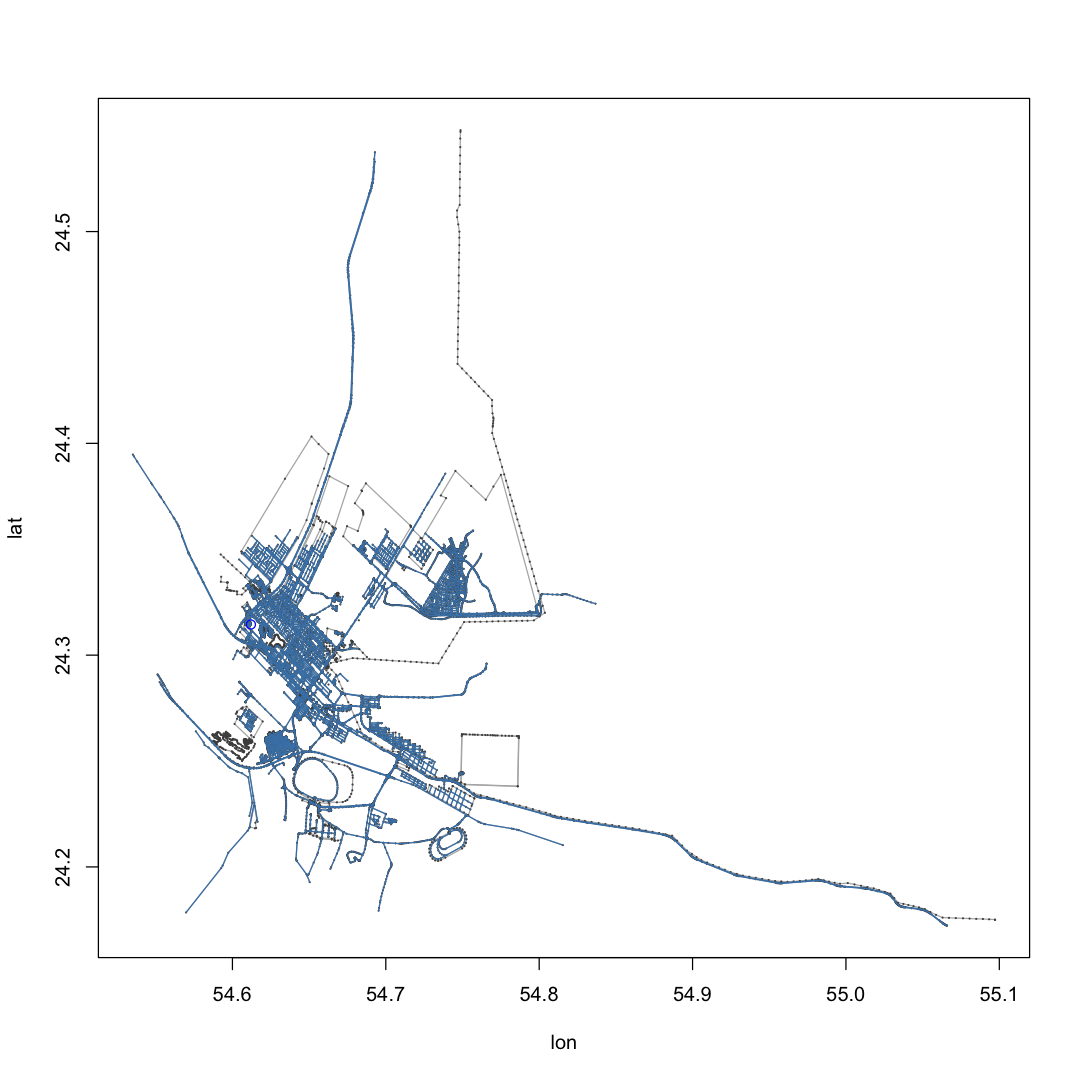

In [27]:
plot(small_abu_dhabi)
plot_ways(hw_abu_dhabi, add = TRUE, col = "steelblue")
plot_nodes(ts_abu_dhabi, add = TRUE, col = "red")
plot_nodes(bs_abu_dhabi, add = TRUE, col = "blue")

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=abu-dhabi&zoom=10&size=640x640&scale=2&maptype=terrain&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=abu-dhabi&sensor=false


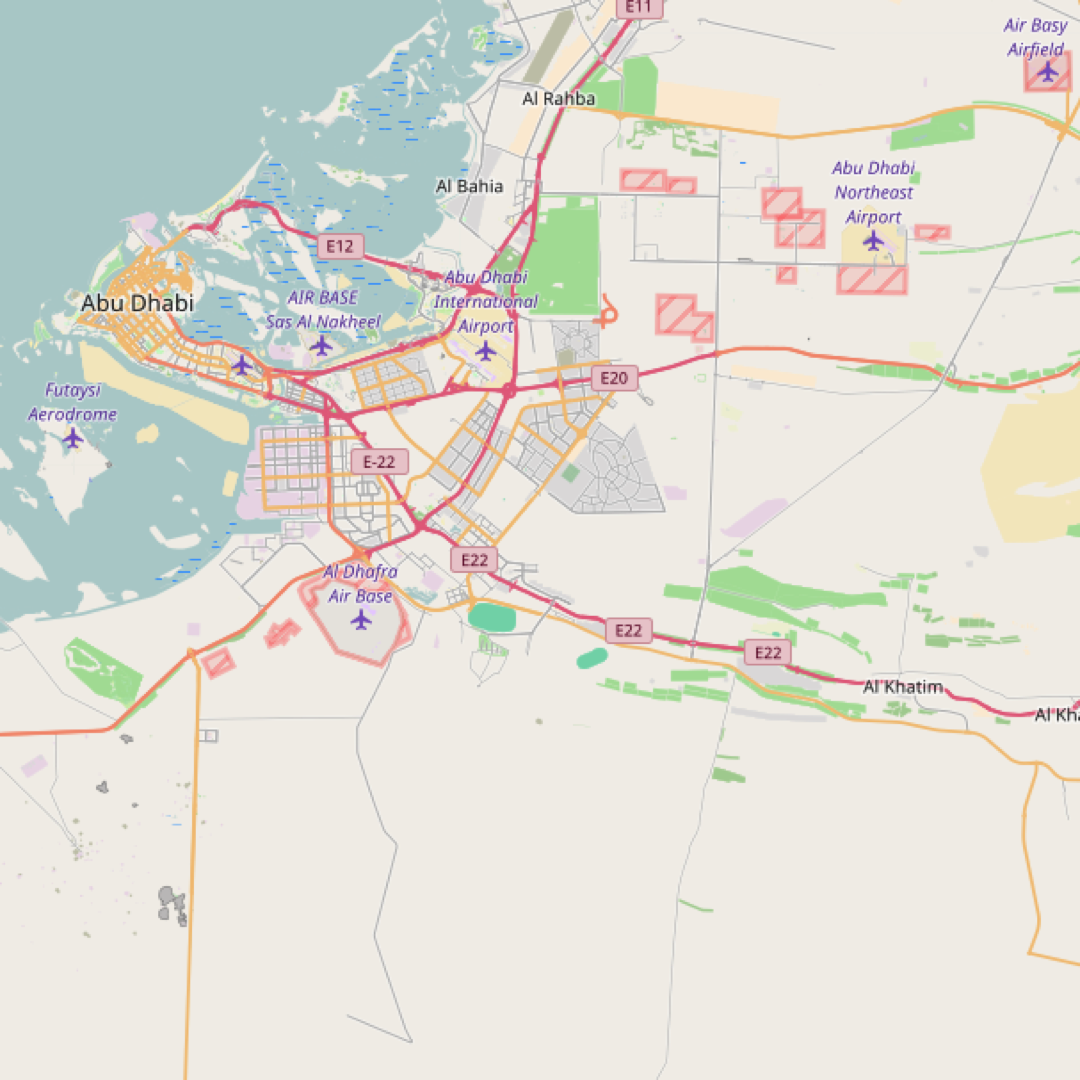

In [28]:
qmap(location = "abu-dhabi", zoom = 10, source = "osm")

Storing 'username' as the environment variable 'plotly_username'


ERROR: Error in Sys.setenv(plotly_username = username): неправильная длина аргумента


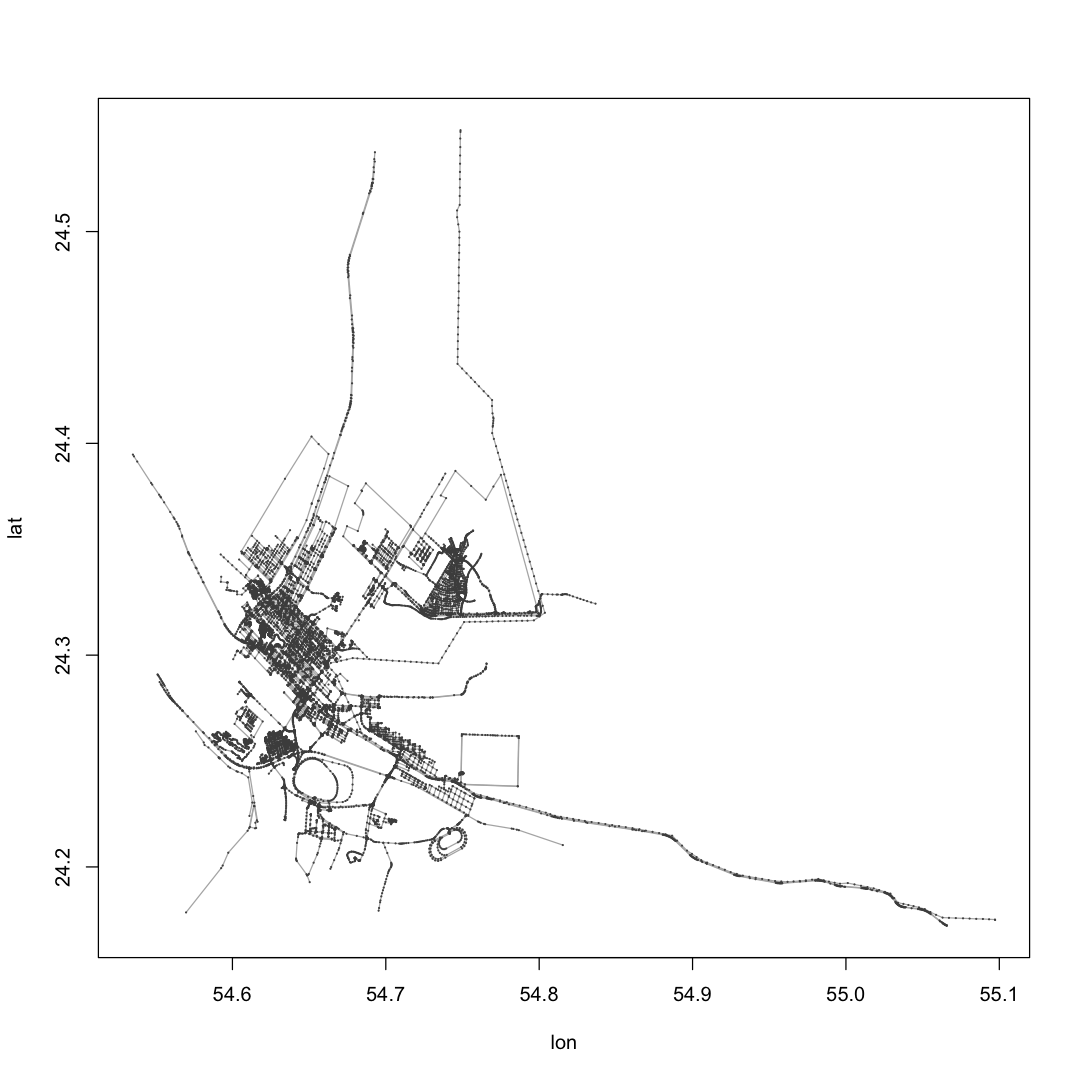

In [34]:
p <- plot(small_abu_dhabi)
pp <- plotly(p)
pp